<a href="https://colab.research.google.com/github/Prasanna-Muthuchidambaram/Iris/blob/main/Iris_k-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PRASANNA M**

## **Task 2 : Prediction using Unsupervised ML**

Datasets : 

In [31]:
#importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [32]:
#Mounting drive 
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
#loading the datasets
iris_data=pd.read_csv("/content/drive/MyDrive/data/Iris.csv")

In [34]:
#displays first 10 rows in dataset
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [35]:
#displaying last 5 rows in dataset
iris_data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [36]:
#count of no. of species in dataset
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [37]:
#prints the summary of the dataframe
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [38]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

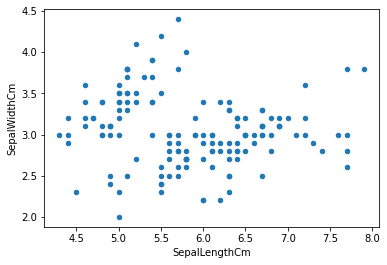

In [39]:
iris_data.plot(kind='scatter',x='SepalLengthCm', y='SepalWidthCm')

In [40]:
iris_data=iris_data.iloc[:,[0,1,2,3]].values

In [41]:
wcss=[]
for i in range(1,14):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=1)
    kmeans.fit(iris_data)
    wcss.append(kmeans.inertia_)
wcss

[281831.54466666665,
 70581.3808,
 31320.711199999998,
 17793.6105117263,
 11461.121470238095,
 7897.687416666667,
 5911.592148127235,
 4590.383682883679,
 3584.635754084967,
 2961.513998168499,
 2476.1461684981687,
 2086.589131368631,
 1765.506965034965]

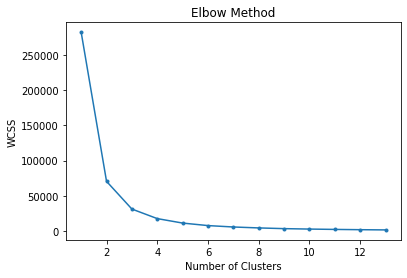

In [42]:
plt.plot(range(1,14),wcss,'.-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [44]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans_y=kmeans.fit_predict(iris_data)
kmeans_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

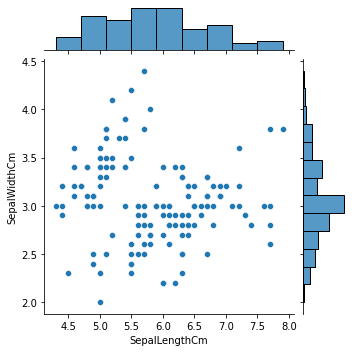

In [8]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm', data=iris_data, size=5)

In [9]:
iris_data.shape

(150, 6)

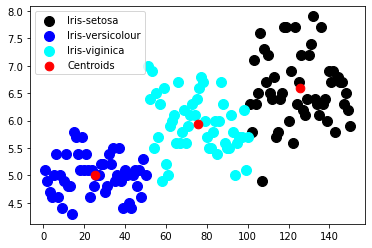

In [47]:
plt.scatter(iris_data[kmeans_y == 0,0],iris_data[kmeans_y == 0,1],s=100,c='black',label='Iris-setosa')
plt.scatter(iris_data[kmeans_y == 1,0],iris_data[kmeans_y == 1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(iris_data[kmeans_y == 2,0],iris_data[kmeans_y == 2,1],s=100,c='cyan',label='Iris-viginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',marker='.',label = 'Centroids')
plt.legend()
plt.show()

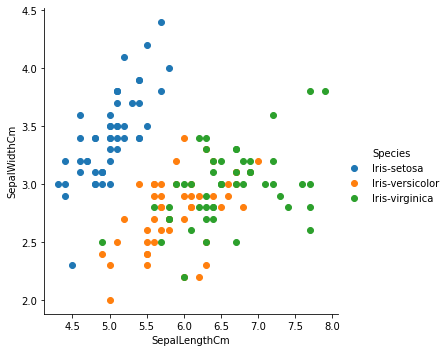

In [11]:
sns.FacetGrid(iris_data, hue = 'Species', size=5) \
    .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
    .add_legend()

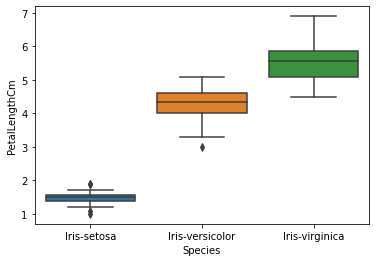

In [12]:
sns.boxplot(x='Species', y='PetalLengthCm', data=iris_data)

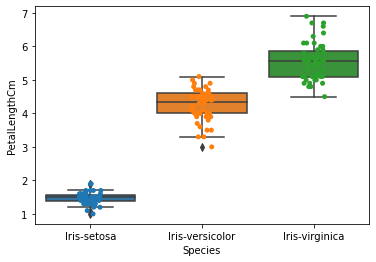

In [13]:
ax = sns.boxplot(data=iris_data, x = 'Species',y = 'PetalLengthCm')
ax = sns.stripplot(data=iris_data, x='Species', y='PetalLengthCm', jitter=True, edgecolor='green')

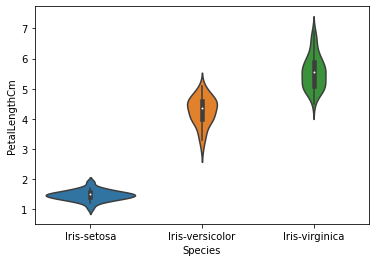

In [14]:
sns.violinplot(x='Species',y='PetalLengthCm', data=iris_data, size=6)

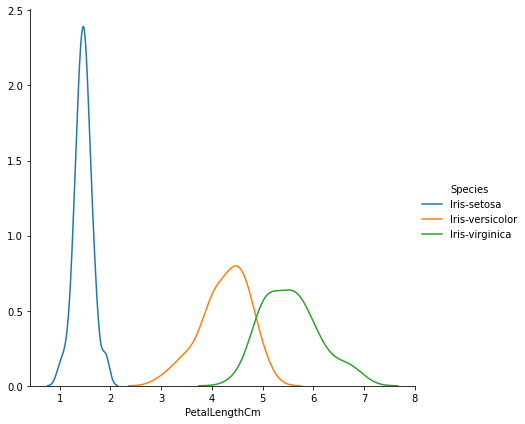

In [15]:
sns.FacetGrid(iris_data, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

In [16]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


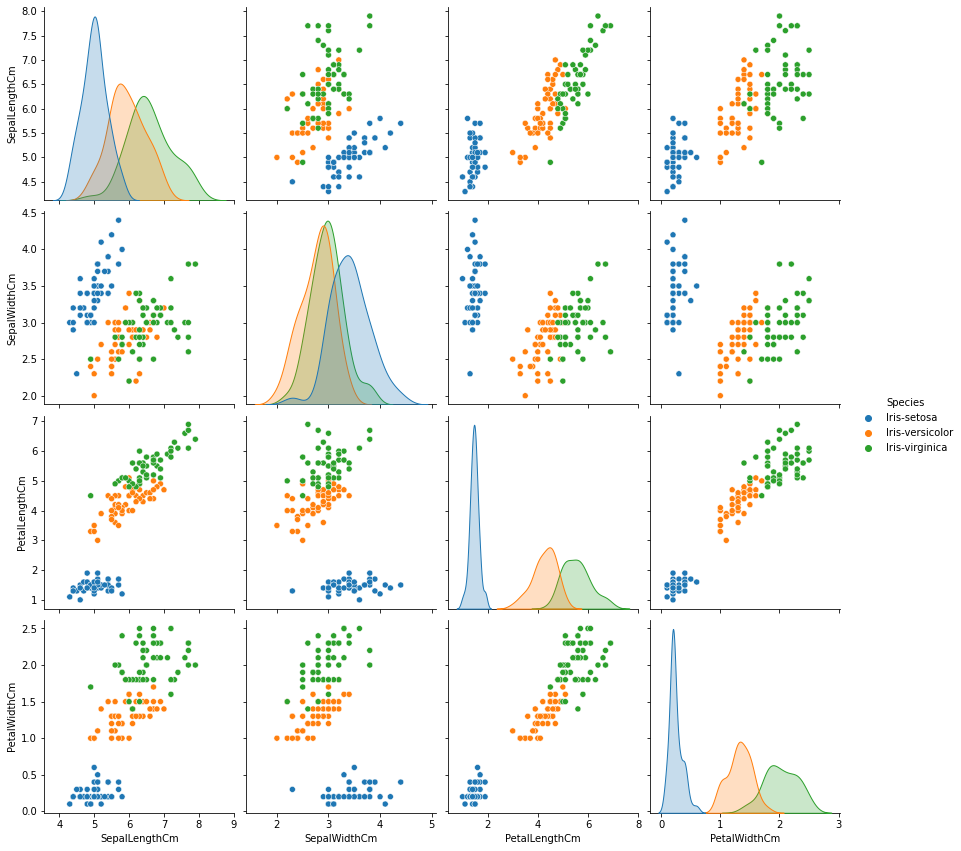

In [17]:
sns.pairplot(iris_data.drop('Id', axis=1), hue='Species', size=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fddd501f090>,
      dtype=object)

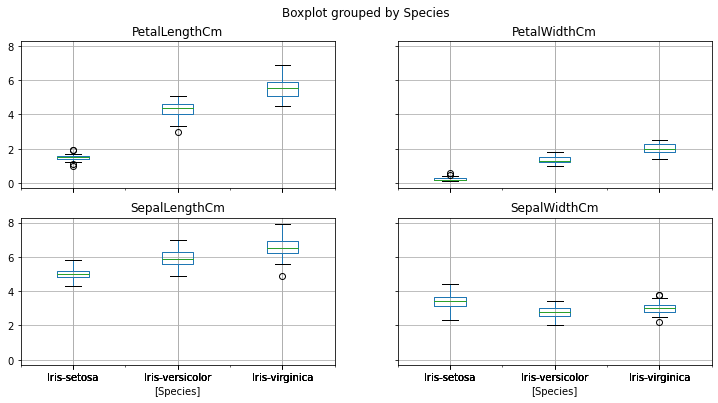

In [18]:
iris_data.drop('Id', axis=1).boxplot(by='Species', figsize=(12,6))

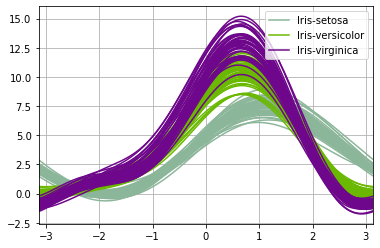

In [19]:
from pandas.plotting import andrews_curves
andrews_curves(iris_data.drop("Id", axis=1), "Species")

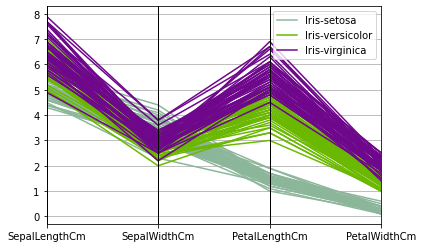

In [20]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris_data.drop("Id", axis=1), "Species")

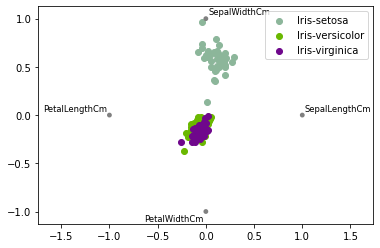

In [21]:
from pandas.plotting import radviz
radviz(iris_data.drop("Id", axis=1), "Species")

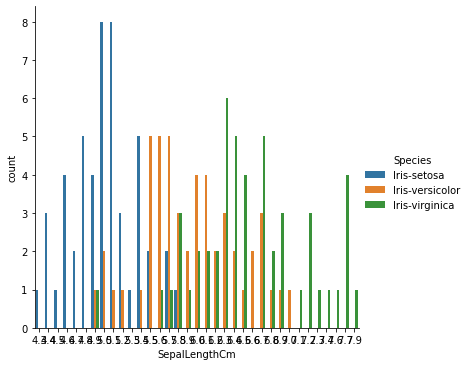

In [22]:
sns.factorplot('SepalLengthCm', data=iris_data, hue='Species', kind='count' )